# Credit Card Fraud Detection

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

In [2]:
#Import dataset
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#Print the number of fraud and Non-fraud
print('Fraud Cases:', len(dataset[dataset['Class'] == 1]))
print('Non-Fraud Cases:', len(dataset[dataset['Class'] == 0]))

Fraud Cases: 492
Non-Fraud Cases: 284315


In [4]:
#X: read all but "Class"
#Y: read only "Class"
X = dataset.iloc[:, :-1].values
y = dataset['Class'].values
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [5]:
#Split the dataset into 25% test_size and 75% training_size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
#Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistics Regression

In [7]:
#Train the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
#Predict the test set
y_pred_lr = lr.predict(X_test)

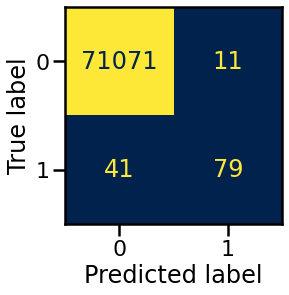

In [9]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(lr, X_test, y_test, cmap='cividis', colorbar=False)

In [10]:
#Area under the precision recall curve (AUPRC) is more suitable to unbalanced classification, Recommended by Kaggle
from sklearn.metrics import average_precision_score
y_score = lr.decision_function(X_test)
avg_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score:', avg_precision)

Average precision-recall score: 0.77211117725839


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.77')

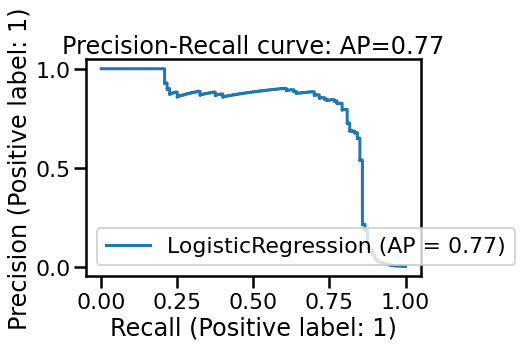

In [11]:
#plot curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(avg_precision))

In [12]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9992696834358585
precision: 0.8777777777777778
recall: 0.6583333333333333
f1_score: 0.7523809523809525


In [13]:
#Gather results into a dataframe
results = pd.DataFrame([['LogisticsRegression', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])

# Logistics Regression (Oversampling)

In [14]:
#Oversample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampledOS, y_train_resampledOS = ros.fit_resample(X_train, y_train)

In [15]:
#Train the oversampled logistic regression model
from sklearn.linear_model import LogisticRegression
lr_resampledOS = LogisticRegression(random_state=0)
lr_resampledOS.fit(X_train_resampledOS, y_train_resampledOS)

LogisticRegression(random_state=0)

In [16]:
#Predict the test set
y_pred_lrOS = lr_resampledOS.predict(X_test)

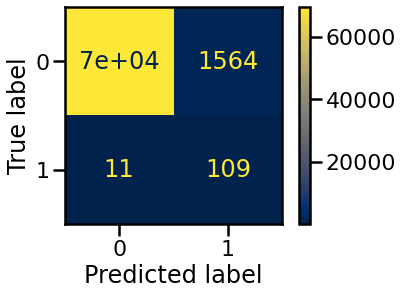

In [17]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(lr_resampledOS, X_test, y_test, cmap='cividis', colorbar=True)

In [18]:
#Area under the precision recall curve (AUPRC) is more suitable to unbalanced classification, Recommended by Kaggle
from sklearn.metrics import average_precision_score
y_score = lr_resampledOS.decision_function(X_test)
avg_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score:', avg_precision)

Average precision-recall score: 0.7595760417231494


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.76')

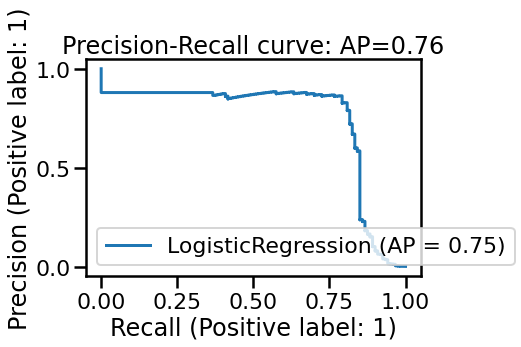

In [19]:
#Plot the curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr_resampledOS, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(avg_precision))

In [20]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_lrOS)
prec = precision_score(y_test, y_pred_lrOS)
rec = recall_score(y_test, y_pred_lrOS)
f1 = f1_score(y_test, y_pred_lrOS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9778798348361001
precision: 0.06515242080095636
recall: 0.9083333333333333
f1_score: 0.12158393753485776


In [21]:
#Gather results into a dataframe
model_results = pd.DataFrame([['OverSampledLogisticsRegression', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Logistics Regression (Undersampling)

In [22]:
#Undersample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampledUS, y_train_resampledUS = rus.fit_resample(X_train, y_train)

In [23]:
#Train the undersampled logistic regression model
from sklearn.linear_model import LogisticRegression
lr_resampledUS = LogisticRegression()
lr_resampledUS.fit(X_train_resampledUS, y_train_resampledUS)

LogisticRegression()

In [24]:
#Predict the test set
y_pred_lrUS = lr_resampledUS.predict(X_test)

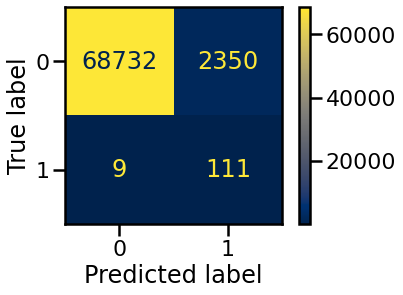

In [25]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(lr_resampledUS, X_test, y_test, cmap='cividis', colorbar=True)

In [26]:
#Area under the precision recall curve (AUPRC) is more suitable to unbalanced classification, Recommended by Kaggle
from sklearn.metrics import average_precision_score
y_score = lr_resampledUS.decision_function(X_test)
avg_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score:', avg_precision)

Average precision-recall score: 0.5965069727327362


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.60')

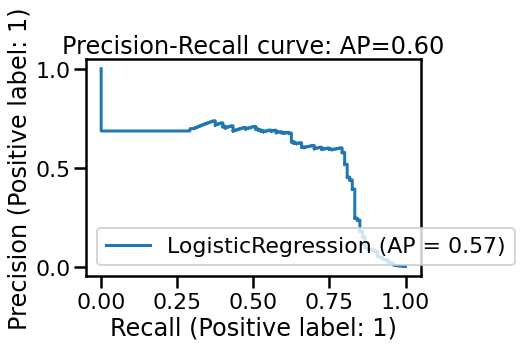

In [27]:
#Plot the curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr_resampledUS, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(avg_precision))

In [28]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_lrUS)
prec = precision_score(y_test, y_pred_lrUS)
rec = recall_score(y_test, y_pred_lrUS)
f1 = f1_score(y_test, y_pred_lrUS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9668689081767367
precision: 0.04510361641609102
recall: 0.925
f1_score: 0.08601317318868655


In [29]:
#Gather results into a dataframe
model_results = pd.DataFrame([['UnderSampledLogisticsRegression', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Random Forest

In [30]:
#Train the random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [31]:
#Predict the test set
y_pred_rfc = rfc.predict(X_test)

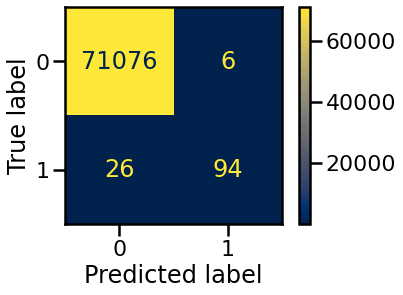

In [32]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap='cividis', colorbar=True)

In [33]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_rfc)
prec = precision_score(y_test, y_pred_rfc)
rec = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9995505744220669
precision: 0.94
recall: 0.7833333333333333
f1_score: 0.8545454545454546


In [34]:
#Gather results into a dataframe
model_results = pd.DataFrame([['RandomForest', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Random Forest (Oversampling)

In [35]:
#Oversample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampledOS, y_train_resampledOS = ros.fit_resample(X_train, y_train)

In [36]:
#Train the oversampled random forest model
from sklearn.ensemble import RandomForestClassifier
rfc_resampledOS = RandomForestClassifier(criterion = 'entropy', random_state = 0)
rfc_resampledOS.fit(X_train_resampledOS, y_train_resampledOS)

RandomForestClassifier(criterion='entropy', random_state=0)

In [37]:
#Predict the test set
y_pred_rfcOS = rfc_resampledOS.predict(X_test)

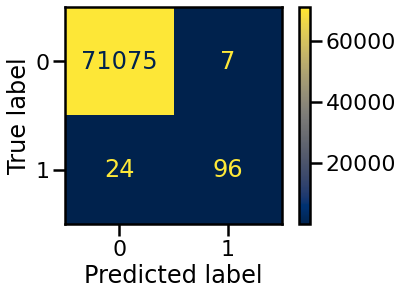

In [38]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(rfc_resampledOS, X_test, y_test, cmap='cividis', colorbar=True)

In [39]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_rfcOS)
prec = precision_score(y_test, y_pred_rfcOS)
rec = recall_score(y_test, y_pred_rfcOS)
f1 = f1_score(y_test, y_pred_rfcOS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9995646189713772
precision: 0.9320388349514563
recall: 0.8
f1_score: 0.8609865470852018


In [40]:
#Gather results into a dataframe
model_results = pd.DataFrame([['OverSampledRandomForest', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Random Forest (Undersampling)

In [41]:
#Undersampled
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampledUS, y_train_resampledUS = rus.fit_resample(X_train, y_train)

In [42]:
#Train the undersampled random forest model
from sklearn.ensemble import RandomForestClassifier
rfc_resampledUS = RandomForestClassifier(criterion = 'entropy', random_state=0)
rfc_resampledUS.fit(X_train_resampledUS, y_train_resampledUS)

RandomForestClassifier(criterion='entropy', random_state=0)

In [43]:
#Predict the test set
y_pred_rfcUS = rfc_resampledUS.predict(X_test)

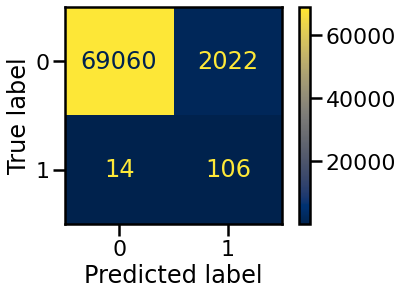

In [44]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import plot_confusion_matrix
sns.set_context("poster")
disp = plot_confusion_matrix(rfc_resampledUS, X_test, y_test, cmap='cividis', colorbar=True)

In [45]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_rfcUS)
prec = precision_score(y_test, y_pred_rfcUS)
rec = recall_score(y_test, y_pred_rfcUS)
f1 = f1_score(y_test, y_pred_rfcUS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9714052976039999
precision: 0.04981203007518797
recall: 0.8833333333333333
f1_score: 0.09430604982206404


In [46]:
#Gather results into a dataframe
model_results = pd.DataFrame([['UnderSampledRandomForest', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Neural Network

In [47]:
#Initialising the ANN
from keras.models import Sequential
ann = Sequential()

In [48]:
from keras.layers import Dense
#Input layer and first hidden layer
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
#hidden layers
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
#Output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [49]:
#Compile the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
#Fit the model
ann.fit(X_train, y_train, batch_size = 10, epochs = 5)

Epoch 1/5
21361/21361 [==============================] - 23s 1ms/step - loss: 0.0072 - accuracy: 0.9990
Epoch 2/5
21361/21361 [==============================] - 26s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 3/5
21361/21361 [==============================] - 31s 1ms/step - loss: 0.0032 - accuracy: 0.9994 0s - los
Epoch 4/5
21361/21361 [==============================] - 26s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/5
21361/21361 [==============================] - 26s 1ms/step - loss: 0.0031 - accuracy: 0.9994 0s - loss: 0.0031 - ac


In [51]:
#Get the generalization error
ann.evaluate(X_test, y_test)

2226/2226 [==============================] - 2s 763us/step - loss: 0.0033 - accuracy: 0.9994


[0.0032530820462852716, 0.9994101524353027]

In [52]:
#Predict the test set
y_pred_nn = ann.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

<AxesSubplot:>

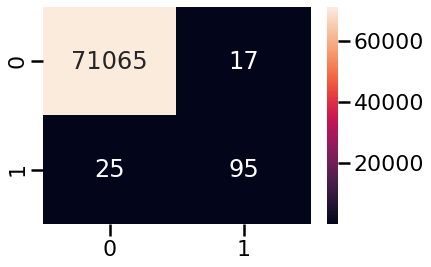

In [53]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import confusion_matrix
sns.set_context("poster")
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='g')

In [54]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_nn)
prec = precision_score(y_test, y_pred_nn)
rec = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9994101289289626
precision: 0.8482142857142857
recall: 0.7916666666666666
f1_score: 0.8189655172413793


In [55]:
#Gather results into a dataframe
model_results = pd.DataFrame([['NeuralNetwork', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Neural Network (Oversampling)

In [56]:
#Oversampled
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampledOS, y_train_resampledOS = ros.fit_resample(X_train, y_train)

In [57]:
#Initialising the ANN
from keras.models import Sequential
ann = Sequential()

In [58]:
from keras.layers import Dense
#Input layer and first hidden layer
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
#hidden layers
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
#Output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [59]:
#Compile the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
#Fit the model
ann.fit(X_train_resampledOS, y_train_resampledOS, batch_size = 10, epochs = 5)

Epoch 1/5
42647/42647 [==============================] - 39s 907us/step - loss: 0.0275 - accuracy: 0.9915
Epoch 2/5
42647/42647 [==============================] - 41s 971us/step - loss: 0.0101 - accuracy: 0.9975s - los
Epoch 3/5
42647/42647 [==============================] - 55s 1ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 4/5
42647/42647 [==============================] - 50s 1ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 5/5
42647/42647 [==============================] - 50s 1ms/step - loss: 0.0048 - accuracy: 0.9989 0s - loss:


In [61]:
#Get the generalization error
ann.evaluate(X_test, y_test)

2226/2226 [==============================] - 2s 696us/step - loss: 0.0119 - accuracy: 0.9985


[0.011896570213139057, 0.9984691739082336]

In [62]:
#Predict the test set
y_pred_nnOS = ann.predict(X_test)
y_pred_nnOS = (y_pred_nnOS > 0.5)

<AxesSubplot:>

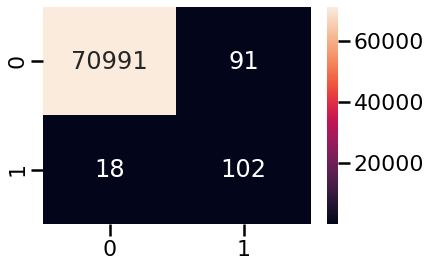

In [63]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import confusion_matrix
sns.set_context("poster")
cm = confusion_matrix(y_test, y_pred_nnOS)
sns.heatmap(cm, annot=True, fmt='g')

In [64]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_nnOS)
prec = precision_score(y_test, y_pred_nnOS)
rec = recall_score(y_test, y_pred_nnOS)
f1 = f1_score(y_test, y_pred_nnOS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9984691441251651
precision: 0.5284974093264249
recall: 0.85
f1_score: 0.6517571884984026


In [65]:
#Gather results into a dataframe
model_results = pd.DataFrame([['OverSampledNeuralNetwork', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

# Neural Network (Undersampling)

In [66]:
#Undersampled
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampledUS, y_train_resampledUS = rus.fit_resample(X_train, y_train)

In [67]:
#Initialising the ANN
from keras.models import Sequential
ann = Sequential()

In [68]:
from keras.layers import Dense
#Input layer and first hidden layer
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
#hidden layers
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
#Output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [69]:
#Compile the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
#Fit the model
ann.fit(X_train_resampledUS, y_train_resampledUS, batch_size = 10, epochs = 5)

Epoch 1/5
75/75 [==============================] - 1s 979us/step - loss: 0.6746 - accuracy: 0.7594
Epoch 2/5
75/75 [==============================] - 0s 912us/step - loss: 0.3969 - accuracy: 0.9301
Epoch 3/5
75/75 [==============================] - 0s 878us/step - loss: 0.2064 - accuracy: 0.9368
Epoch 4/5
75/75 [==============================] - 0s 952us/step - loss: 0.1560 - accuracy: 0.9462
Epoch 5/5
75/75 [==============================] - 0s 878us/step - loss: 0.1427 - accuracy: 0.9462


In [71]:
#Get the generalization error
ann.evaluate(X_test, y_test)

2226/2226 [==============================] - 2s 635us/step - loss: 0.1280 - accuracy: 0.9621


[0.1280244141817093, 0.9620797038078308]

In [72]:
#Predict the test set
y_pred_nnUS = ann.predict(X_test)
y_pred_nnUS = (y_pred_nnUS > 0.5)

<AxesSubplot:>

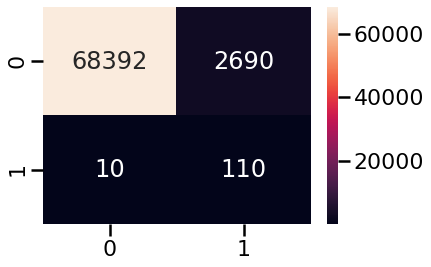

In [73]:
#Confusion matrix accuracy is not meaningful for unbalanced classification
from sklearn.metrics import confusion_matrix
sns.set_context("poster")
cm = confusion_matrix(y_test, y_pred_nnUS)
sns.heatmap(cm, annot=True, fmt='g')

In [74]:
#Get accuracy/precision/recall/f1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred_nnUS)
prec = precision_score(y_test, y_pred_nnUS)
rec = recall_score(y_test, y_pred_nnUS)
f1 = f1_score(y_test, y_pred_nnUS)
print('accuracy:', acc)
print('precision:', prec)
print('recall:', rec)
print('f1_score:', f1)

accuracy: 0.9620797168618859
precision: 0.039285714285714285
recall: 0.9166666666666666
f1_score: 0.07534246575342465


In [75]:
#Gather results into a dataframe
#Final results
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', rec, prec, f1]],
               columns = ['Model', 'Recall', 'Precision', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Recall,Precision,F1 Score
0,LogisticsRegression,0.658333,0.877778,0.752381
1,OverSampledLogisticsRegression,0.908333,0.065152,0.121584
2,UnderSampledLogisticsRegression,0.925000,0.045104,0.086013
3,RandomForest,0.783333,0.940000,0.854545
4,OverSampledRandomForest,0.800000,0.932039,0.860987
5,UnderSampledRandomForest,0.883333,0.049812,0.094306
6,NeuralNetwork,0.791667,0.848214,0.818966
7,OverSampledNeuralNetwork,0.850000,0.528497,0.651757
8,UnderSampledNeuralNetwork,0.916667,0.039286,0.075342
